In [6]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO
from venn import venn
import scipy
import statistics

In [7]:
# setting variables
PATH = '...'
RES = PATH + '/resources/'
OUTDIR = PATH + '/output'

In [8]:
# Input the HSP and CP450 protein coding genes used in this project
CP450_SYM = open(OUTDIR + '/hsp/CP450_list').read().splitlines()
HSP_SYM = open(OUTDIR + '/hsp/HSP_list').read().splitlines()
print('# CP450 Symbols:', CP450_SYM)
print('# HSP Symbols:', HSP_SYM)
print(len(CP450_SYM), len(HSP_SYM))

# CP450 Symbols: ['MYCTH_101224', 'MYCTH_102965', 'MYCTH_108294', 'MYCTH_108615', 'MYCTH_110187', 'MYCTH_110956', 'MYCTH_112051', 'MYCTH_112815', 'MYCTH_16353', 'MYCTH_2049011', 'MYCTH_2060065', 'MYCTH_2060315', 'MYCTH_2061987', 'MYCTH_2063204', 'MYCTH_2070700', 'MYCTH_2108406', 'MYCTH_2109000', 'MYCTH_2111803', 'MYCTH_2112496', 'MYCTH_2114617', 'MYCTH_2116457', 'MYCTH_2117759', 'MYCTH_2118655', 'MYCTH_2120504', 'MYCTH_2120753', 'MYCTH_2120988', 'MYCTH_2129362', 'MYCTH_2139973', 'MYCTH_2294752', 'MYCTH_2296119', 'MYCTH_2296433', 'MYCTH_2300049', 'MYCTH_2301715', 'MYCTH_2302552', 'MYCTH_2304390', 'MYCTH_2305436', 'MYCTH_2305689', 'MYCTH_2305868', 'MYCTH_2306031', 'MYCTH_2306212', 'MYCTH_2306216', 'MYCTH_2306662', 'MYCTH_2306945', 'MYCTH_2307054', 'MYCTH_2307682', 'MYCTH_2308893', 'MYCTH_2308895', 'MYCTH_2309477', 'MYCTH_2312925', 'MYCTH_73182', 'MYCTH_73679', 'MYCTH_75334', 'MYCTH_81364', 'MYCTH_95473']
# HSP Symbols: ['MYCTH_2315513', 'MYCTH_2097570', 'MYCTH_2294664', 'MYCTH_2086391', 

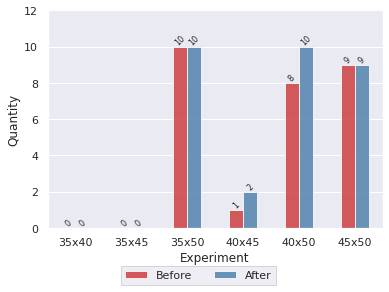

In [12]:
# DEG only for HSP and CP450 genes - without tracking - from before & after
data_paper = {
    '35x40': '/DESeq/result_35_40_paper_output.csv',
    '35x45': '/DESeq/result_35_45_paper_output.csv',
    '35x50': '/DESeq/result_35_50_paper_output.csv',
    '40x45': '/DESeq/result_40_45_paper_output.csv',
    '40x50': '/DESeq/result_40_50_paper_output.csv',
    '45x50': '/DESeq/result_45_50_paper_output.csv',    
    }

data_my = {
    '35x40': '/DESeq/result_35_40_my_output.csv',
    '35x45': '/DESeq/result_35_45_my_output.csv',
    '35x50': '/DESeq/result_35_50_my_output.csv',
    '40x45': '/DESeq/result_40_45_my_output.csv',
    '40x50': '/DESeq/result_40_50_my_output.csv',
    '45x50': '/DESeq/result_45_50_my_output.csv',    
    }

dpp_35_40 = [x.split(',')[0].replace('"','').upper() for x in open(OUTDIR + data_paper['35x40']) if 'baseMean' not in x]
dpp_35_45 = [x.split(',')[0].replace('"','').upper() for x in open(OUTDIR + data_paper['35x40']) if 'baseMean' not in x]
dpp_35_50 = [x.split(',')[0].replace('"','').upper() for x in open(OUTDIR + data_paper['35x50']) if 'baseMean' not in x]
dpp_40_45 = [x.split(',')[0].replace('"','').upper() for x in open(OUTDIR + data_paper['40x45']) if 'baseMean' not in x]
dpp_40_50 = [x.split(',')[0].replace('"','').upper() for x in open(OUTDIR + data_paper['40x50']) if 'baseMean' not in x]
dpp_45_50 = [x.split(',')[0].replace('"','').upper() for x in open(OUTDIR + data_paper['45x50']) if 'baseMean' not in x]

dmy_35_40 = [x.split(',')[0].replace('"','').upper() for x in open(OUTDIR + data_my['35x40']) if 'baseMean' not in x]
dmy_35_45 = [x.split(',')[0].replace('"','').upper() for x in open(OUTDIR + data_my['35x40']) if 'baseMean' not in x]
dmy_35_50 = [x.split(',')[0].replace('"','').upper() for x in open(OUTDIR + data_my['35x50']) if 'baseMean' not in x]
dmy_40_45 = [x.split(',')[0].replace('"','').upper() for x in open(OUTDIR + data_my['40x45']) if 'baseMean' not in x]
dmy_40_50 = [x.split(',')[0].replace('"','').upper() for x in open(OUTDIR + data_my['40x50']) if 'baseMean' not in x]
dmy_45_50 = [x.split(',')[0].replace('"','').upper() for x in open(OUTDIR + data_my['45x50']) if 'baseMean' not in x]


data_pp = [['35x40', 'HSP', len(set(dpp_35_40).intersection(set(HSP_SYM))), 'Before'], 
        ['35x45', 'HSP', len(set(dpp_35_45).intersection(set(HSP_SYM))), 'Before'],
        ['35x50', 'HSP', len(set(dpp_35_50).intersection(set(HSP_SYM))), 'Before'], 
        ['40x45', 'HSP', len(set(dpp_40_45).intersection(set(HSP_SYM))), 'Before'], 
        ['40x50', 'HSP', len(set(dpp_40_50).intersection(set(HSP_SYM))), 'Before'], 
        ['45x50', 'HSP', len(set(dpp_45_50).intersection(set(HSP_SYM))), 'Before']]

data_my = [['35x40', 'HSP', len(set(dmy_35_40).intersection(set(HSP_SYM))), 'After'], 
        ['35x45', 'HSP', len(set(dmy_35_45).intersection(set(HSP_SYM))), 'After'],
        ['35x50', 'HSP', len(set(dmy_35_50).intersection(set(HSP_SYM))), 'After'], 
        ['40x45', 'HSP', len(set(dmy_40_45).intersection(set(HSP_SYM))), 'After'], 
        ['40x50', 'HSP', len(set(dmy_40_50).intersection(set(HSP_SYM))), 'After'], 
        ['45x50', 'HSP', len(set(dmy_45_50).intersection(set(HSP_SYM))), 'After']]

df = pd.DataFrame(data_pp + data_my, columns=['Experiment', 'Protein', 'Quantity', 'Type'])

import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid", palette='Set1')
g = sns.barplot(data=df, x="Experiment", y="Quantity", hue="Type", alpha = 0.8, errorbar=None, width=.5)
plt.ylim(0,12)

for c in g.axes.containers:
    labels = [f'{(v.get_height()):.0f}' for v in c]
    g.axes.bar_label(c, labels=labels, label_type='edge', size=8, rotation=45)


plt.legend(loc='upper center', bbox_to_anchor=(0.45, -0.15),
          fancybox=False, shadow=False, ncol=5)

plt.savefig('FIG4.png', dpi=300)

In [13]:
# MODIFIED! Better using this method instead of the above
def get_info(_group=[], _count=3):
    # If any transcripts were expressed -skip
    if (len([g for g in _group if '-' in g]) <= _count):
        # Exon - mode, fpkm & tpm - median, cov - mean, len - mode 
        exons, fpkms, tpms, coverages, lengths = [],[],[],[],[]
        
        for each in _group:
            # if the transcript was expressed in the experiment
            if '-' not in each:
                # exons
                exons.append(int(each.split('|')[2]))
                fpkms.append(float(each.split('|')[3]))
                tpms.append(float(each.split('|')[4]))
                coverages.append(float(each.split('|')[5]))
                lengths.append(int(each.split('|')[6]))
        # Exon, FPKM, FPKM STD, TPM, TPM STD, coverage, coverage STD, length, length STD
        if _count < 2:
            return [statistics.mode(exons), statistics.mean(fpkms), statistics.stdev(fpkms), statistics.mean(tpms), statistics.stdev(tpms), statistics.mean(coverages), statistics.stdev(coverages), statistics.mean(lengths), statistics.stdev(lengths)]
        else:
            return [statistics.mode(exons), statistics.mean(fpkms), None, statistics.mean(tpms), None, statistics.mean(coverages), None, statistics.mean(lengths), None]
    
    return None

# Without validation!
def get_tracking(_code=['u','i','x','='], _group={}, _exp=3):
    # Keys:
    #   info - exons, TPM, length. total of isoforms
    #   groups: [ex1, ex2, ex3, ...]
    dic_ret = {}
    exp = 0 if _exp == 3 else 1 if _exp == 2 else 2

    dic_group = dict()
    # Correct base 0 in Python
    for k,v in _group.items():
        dic_group[k] = [x + 3 for x in v]
    
    with open(OUTDIR + '/stringTie/track/ALL_merged_track.tracking') as out:
        # Keep all the info
        dic_tmp = dict()
        # Keep temporary experiments and groups
        
        for line in out.read().splitlines():
            # frag, locus, gene, code, exp*
            #    0,     1,    2,    3, ...
            param = []
            for each in line.split('\t'):
                    param.append(each)
            
            if param[3] in _code:
                for k, v in dic_group.items():
                    group = []
                    # selecting groups from the dict group: q1,q2,q12 / q3,q4,q5 ... by position
                    for each in v:
                        group.append(param[each])

                    dic_tmp[k] = group

                # Processing the experiments 35: [q3,q4,q5], 40: [q6,q7,q8]...
                dic_info = {}
                
                for k, group in dic_tmp.items():
                    # If the group doesn't have any transcript, skip
                    dic_info[k] = get_info(group, exp)
                
                # Check if all values in the dict is None
                tmp_dict = {k: v for k, v in dic_info.items() if v is not None}
                
                if len(tmp_dict) > 0:
                    dic_ret[(param[0],param[1],param[3],param[2])] = dic_info

                # Processing the info
    return dic_ret

# Count all transcripts from tracking
def count_transcript(tmp, typ):
    dic_exp = {'35': 0, '40': 0, '45': 0, '50': 0}
    dict_u = {key: tmp[key] for key in tmp.keys() if typ in key}

    for _,v in dict_u.items():
        for key, value in v.items():
            if value != None:
                dic_exp[key] = dic_exp[key] + 1

    return dic_exp

# Get only one transcript type in a dict
def get_only_transcripts(tmp, typ):
    # Get only specific transcripts
    dic = {key: tmp[key] for key in tmp.keys() if (typ in key)}
    return dic

# return locus from a transfrag
def get_locus(trans):
    for k, _ in all_transcripts.items():
        if trans in k:
            return k[1]

def get_validated_symbols():
    tmp = {'pcg':[], 'lncrna':[]}
    info = get_validated()
    for k in info['='].keys():
        tmp['pcg'].append(k[3].split('|')[0].split('-')[1])
    for k in info['u'].keys():
        tmp['lncrna'].append(k[1])
    for k in info['x'].keys():
        tmp['lncrna'].append(k[1])
    for k in info['i'].keys():
        tmp['lncrna'].append(k[1])
        
    return tmp

def get_validated_symbols_temp():
    tmp = {'35': [], '40': [], '45': [], '50': []}
    for _,v in get_validated().items():
        for key, val in v.items():
            for each in ['35','40','45','50']:
                if val[each] is not None:
                    if key[2] == '=':
                        tmp[each].append(key[3].split('|')[0].split('-')[1])
                    else:
                        tmp[each].append(key[1])
        
    return tmp


# Read the tracking transcritps into a dict of biopython sequences
with open(OUTDIR + '/stringTie/track/ALL_merged_track.fasta') as tmp:
    seq_dic = SeqIO.to_dict(SeqIO.parse(tmp, "fasta"))

# Get validated transcripts after Blastx, InterProScan and CPC2 - only unique transcripts
def get_validated():
    put_lnc_anti = [x.strip() for x in open(OUTDIR + '/lncrna/antisense_putative_lncrnas_ids')]
    put_lnc_inter = [x.strip() for x in open(OUTDIR + '/lncrna/intergenic_putative_lncrnas_ids')]
    put_lnc_intra = [x.strip() for x in open(OUTDIR + '/lncrna/intragenic_putative_lncrnas_ids')]

    dic_inter = get_only_transcripts(all_transcripts, 'u')
    dic_antis = get_only_transcripts(all_transcripts, 'x')
    dic_intra = get_only_transcripts(all_transcripts, 'i')
    dic_mrna = get_only_transcripts(all_transcripts, '=')

    dic_inter_tmp = dict(dic_inter)
    dic_antis_tmp = dict(dic_antis)
    dic_intra_tmp = dict(dic_intra)

    for k,v in dic_inter.items():
        if k[0] not in put_lnc_inter:
            del dic_inter_tmp[k]

    for k,v in dic_antis.items():
        if k[0] not in put_lnc_anti:
            del dic_antis_tmp[k]

    for k,v in dic_intra.items():
        if k[0] not in put_lnc_intra:
            del dic_intra_tmp[k]

    return {'=':dic_mrna, 'u': dic_inter_tmp, 'x': dic_antis_tmp, 'i': dic_intra_tmp}

group = {'35':[3,4,5],'40':[6,7,8], '45':[9,10,11], '50':[1,2,12]}
all_transcripts = get_tracking(_group=group, _exp=3)

In [14]:
for each in ['u','i','x','=']:
    print(each, count_transcript(get_validated()[each], each))

u {'35': 138, '40': 102, '45': 189, '50': 81}
i {'35': 1, '40': 0, '45': 3, '50': 0}
x {'35': 12, '40': 14, '45': 28, '50': 10}
= {'35': 6288, '40': 5951, '45': 5382, '50': 6422}


In [11]:
# Check transcripts
vals = get_tracking(_group=group, _exp=3)

# All transcripts
tmp = count_transcript(vals, 'u')

# Only unique transcripts per experiment

all_count = []

key_x = get_validated()['u']
tmp = count_transcript(key_x, 'u')
for k,v in tmp.items():
    all_count.append(v)

key_x = get_validated()['x']
tmp = count_transcript(key_x, 'x')
for k,v in tmp.items():
    all_count.append(v)

key_x = get_validated()['i']
tmp = count_transcript(key_x, 'i')
for k,v in tmp.items():
    all_count.append(v)

print('Total', sum(all_count))

Total 578


In [ ]:
# Return validated transcripts after 
all_uniq = set()
key_i, key_x, key_u = get_validated()['i'], get_validated()['x'], get_validated()['u']
for each in [key_i, key_x, key_u]:
    for k, _ in each.items():
        all_uniq.add(k[1])

for k, _ in get_validated()['='].items():
    all_uniq.add(k[3].split('|')[0].split('-')[1])

for i in all_uniq:
    print(i)

In [7]:
group = {'35':[3,4,5],'40':[6,7,8], '45':[9,10,11], '50':[1,2,12]}

cols = ['Temperature', 'Quantity']
# Probable
vals = get_tracking(_group=group, _exp=3)

tmp = count_transcript(vals, 'u')
df_3x_u = pd.DataFrame(tmp.items(), columns=cols)
df_3x_u['Transcript'] = 'Intergenic'

tmp = count_transcript(vals, 'x')
df_3x_x = pd.DataFrame(tmp.items(), columns=cols)
df_3x_x['Transcript'] = 'Antisense'

tmp = count_transcript(vals, 'i')
df_3x_i = pd.DataFrame(tmp.items(), columns=cols)
df_3x_i['Transcript'] = 'Intragenic'

df3 = pd.concat([df_3x_u, df_3x_x, df_3x_i], axis=0)
df3['Sample'] = 'Probable'


# Likely
vals = get_tracking(_group=group, _exp=2)

tmp = count_transcript(vals, 'u')
df_2x_u = pd.DataFrame(tmp.items(), columns=cols)
df_2x_u['Transcript'] = 'Intergenic'

tmp = count_transcript(vals, 'x')
df_2x_x = pd.DataFrame(tmp.items(), columns=cols)
df_2x_x['Transcript'] = 'Antisense'

tmp = count_transcript(vals, 'i')
df_2x_i = pd.DataFrame(tmp.items(), columns=cols)
df_2x_i['Transcript'] = 'Intragenic'

df2 = pd.concat([df_2x_u, df_2x_x, df_2x_i], axis=0)
df2['Sample'] = 'Likely'


# Unlikely
vals = get_tracking(_group=group, _exp=1)

tmp = count_transcript(vals, 'u')
df_1x_u = pd.DataFrame(tmp.items(), columns=cols)
df_1x_u['Transcript'] = 'Intergenic'

tmp = count_transcript(vals, 'x')
df_1x_x = pd.DataFrame(tmp.items(), columns=cols)
df_1x_x['Transcript'] = 'Antisense'

tmp = count_transcript(vals, 'i')
df_1x_i = pd.DataFrame(tmp.items(), columns=cols)
df_1x_i['Transcript'] = 'Intragenic'

df1 = pd.concat([df_1x_u, df_1x_x, df_1x_i], axis=0)
df1['Sample'] = 'Unlikely'

df = pd.concat([df3, df2, df1], axis=0)

In [18]:
group = {'35':[3,4,5],'40':[6,7,8], '45':[9,10,11], '50':[1,2,12]}

cols = ['Temperature', 'Quantity']
# Probable
vals = get_tracking(_group=group, _exp=3)

tmp = count_transcript(vals, 'u')
df_3x_u = pd.DataFrame(tmp.items(), columns=cols)
df_3x_u['Transcript'] = 'Intergenic'

tmp = count_transcript(vals, 'x')
df_3x_x = pd.DataFrame(tmp.items(), columns=cols)
df_3x_x['Transcript'] = 'Antisense'

tmp = count_transcript(vals, 'i')
df_3x_i = pd.DataFrame(tmp.items(), columns=cols)
df_3x_i['Transcript'] = 'Intragenic'

df3 = pd.concat([df_3x_u, df_3x_x, df_3x_i], axis=0)
df3['Sample'] = 'Probable'


# Likely
vals = get_tracking(_group=group, _exp=2)

tmp = count_transcript(vals, 'u')
df_2x_u = pd.DataFrame(tmp.items(), columns=cols)
df_2x_u['Transcript'] = 'Intergenic'

tmp = count_transcript(vals, 'x')
df_2x_x = pd.DataFrame(tmp.items(), columns=cols)
df_2x_x['Transcript'] = 'Antisense'

tmp = count_transcript(vals, 'i')
df_2x_i = pd.DataFrame(tmp.items(), columns=cols)
df_2x_i['Transcript'] = 'Intragenic'

df2 = pd.concat([df_2x_u, df_2x_x, df_2x_i], axis=0)
df2['Sample'] = 'Likely'


# Unlikely
vals = get_tracking(_group=group, _exp=1)

tmp = count_transcript(vals, 'u')
df_1x_u = pd.DataFrame(tmp.items(), columns=cols)
df_1x_u['Transcript'] = 'Intergenic'

tmp = count_transcript(vals, 'x')
df_1x_x = pd.DataFrame(tmp.items(), columns=cols)
df_1x_x['Transcript'] = 'Antisense'

tmp = count_transcript(vals, 'i')
df_1x_i = pd.DataFrame(tmp.items(), columns=cols)
df_1x_i['Transcript'] = 'Intragenic'

df1 = pd.concat([df_1x_u, df_1x_x, df_1x_i], axis=0)
df1['Sample'] = 'Unlikely'

df = pd.concat([df3, df2, df1], axis=0)

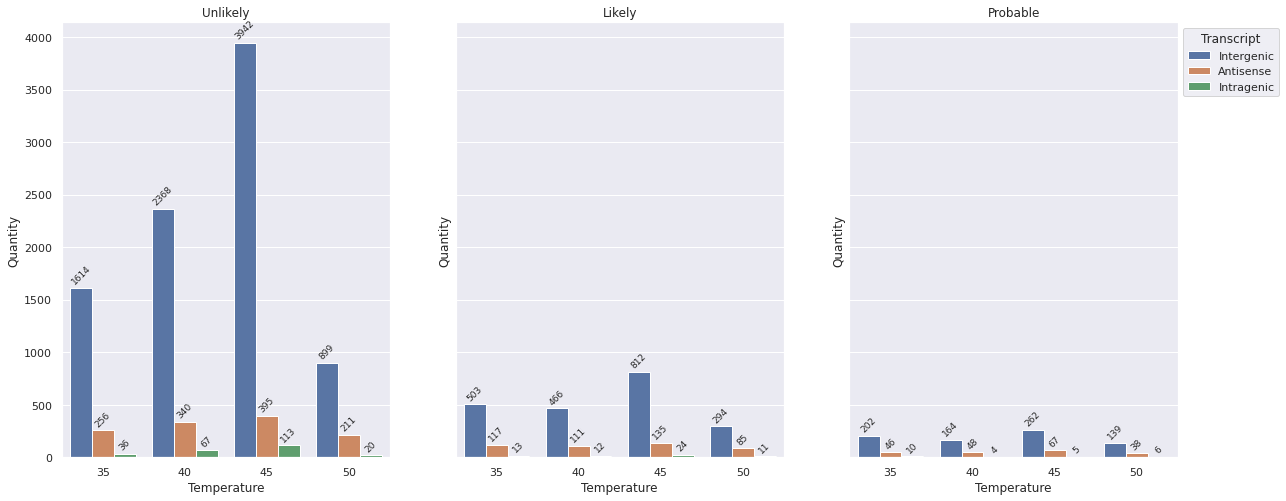

In [19]:
sns.set_theme(style="darkgrid")

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8), sharey=True)
g0 = sns.barplot(data=df[df.Sample == 'Unlikely'], x='Temperature', y='Quantity', hue='Transcript', errorbar=None, ax=ax1)
ax1.legend_.remove()
ax1.set_title('Unlikely')
g1 = sns.barplot(data=df[df.Sample == 'Likely'], x='Temperature', y='Quantity', hue='Transcript', errorbar=None, ax=ax2)
ax2.legend_.remove()
ax2.set_title('Likely')
g2 = sns.barplot(data=df[df.Sample == 'Probable'], x='Temperature', y='Quantity', hue='Transcript', errorbar=None, ax=ax3)
ax3.set_title('Probable')
sns.move_legend(ax3, "upper left", bbox_to_anchor=(1, 1))

for ax in [ax1, ax2, ax3]:
    # iterate through the axes containers
    for c in ax.containers:
        labels = [f'{(v.get_height()):.0f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', size=9, rotation=45, padding=2)


In [ ]:
# Keep only the highest coverage isoforms in gene count matrix - output screen
all_uniq = set()
key_i, key_x, key_u = get_validated()['i'], get_validated()['x'], get_validated()['u']
for each in [key_i, key_x, key_u]:
    for k, _ in each.items():
        all_uniq.add(k[1])

for k, _ in get_validated()['='].items():
    all_uniq.add(k[3].split('|')[0].split('-')[1])

file = '/run/media/roger/backup/UFMG/experiments/lncrna/output/features/gene_count_matrix.csv'
dic = {}
with open(file) as out:
    for line in out.read().splitlines():
        # skip the header
        if 'gene_id' not in line:
            gene, q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12 = line.split(',')
            ltmp = list(map(int, [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12]))
            if "|" in gene:
                # Not in dic - insert
                if '-' in gene:
                    gtmp = gene.split('|')[1].split('-')[1]
                else:
                    gtmp = gene
                    
                if gtmp not in dic.keys():
                    dic[gtmp] = ltmp
                else:
                    # update
                    if sum(ltmp) > sum(dic[gtmp]):
                        dic[gtmp] = ltmp
            else:
                # non-coding transcripts
                dic[gene] = ltmp

for k,v in dic.items():
    if k in all_uniq:
        print(k+',',','.join(map(str,v)), sep='')

In [ ]:
# Processing DESeq2 output

dir_f = OUTDIR + '/DESeq/'

# skip the first line
pp_35_40 = set([x.split(',')[0] for x in open(dir_f + 'result_35_40_paper_output.csv').read().splitlines() if 'MYCTH' in x.upper()])
pp_35_45 = set([x.split(',')[0] for x in open(dir_f + 'result_35_45_paper_output.csv').read().splitlines() if 'MYCTH' in x.upper()])
pp_35_50 = set([x.split(',')[0] for x in open(dir_f + 'result_35_50_paper_output.csv').read().splitlines() if 'MYCTH' in x.upper()])
pp_40_45 = set([x.split(',')[0] for x in open(dir_f + 'result_40_45_paper_output.csv').read().splitlines() if 'MYCTH' in x.upper()])
pp_40_50 = set([x.split(',')[0] for x in open(dir_f + 'result_40_50_paper_output.csv').read().splitlines() if 'MYCTH' in x.upper()])
pp_45_50 = set([x.split(',')[0] for x in open(dir_f + 'result_45_50_paper_output.csv').read().splitlines() if 'MYCTH' in x.upper()])
pp_df = pd.DataFrame([['DEG','Before',len(pp_35_40), len(pp_35_45), len(pp_35_50), len(pp_40_45), len(pp_40_50), len(pp_45_50)]], columns=['Type','Status','35x40', '35x45', '35x50', '40x45','40x50', '45x50' ])

# Only PCG MYCTH
my_35_40 = set([x.split(',')[0] for x in open(dir_f + 'result_35_40_my_output.csv').read().splitlines() if 'MYCTH' in x])
my_35_45 = set([x.split(',')[0] for x in open(dir_f + 'result_35_45_my_output.csv').read().splitlines() if 'MYCTH' in x])
my_35_50 = set([x.split(',')[0] for x in open(dir_f + 'result_35_50_my_output.csv').read().splitlines() if 'MYCTH' in x])
my_40_45 = set([x.split(',')[0] for x in open(dir_f + 'result_40_45_my_output.csv').read().splitlines() if 'MYCTH' in x])
my_40_50 = set([x.split(',')[0] for x in open(dir_f + 'result_40_50_my_output.csv').read().splitlines() if 'MYCTH' in x])
my_45_50 = set([x.split(',')[0] for x in open(dir_f + 'result_45_50_my_output.csv').read().splitlines() if 'MYCTH' in x])
my_df = pd.DataFrame([['DEG','After',len(my_35_40), len(my_35_45), len(my_35_50), len(my_40_45), len(my_40_50), len(my_45_50)]], columns=['Type','Status','35x40', '35x45', '35x50', '40x45','40x50', '45x50' ])

# Processing HSP and CP450 genes
pp_hsp_35_40 = set([x.split(',')[0] for x in pp_35_40 if x.replace('"','').upper() in HSP_SYM])
pp_hsp_35_45 = set([x.split(',')[0] for x in pp_35_45 if x.replace('"','').upper() in HSP_SYM])
pp_hsp_35_50 = set([x.split(',')[0] for x in pp_35_50 if x.replace('"','').upper() in HSP_SYM])
pp_hsp_40_45 = set([x.split(',')[0] for x in pp_40_45 if x.replace('"','').upper() in HSP_SYM])
pp_hsp_40_50 = set([x.split(',')[0] for x in pp_40_50 if x.replace('"','').upper() in HSP_SYM])
pp_hsp_45_50 = set([x.split(',')[0] for x in pp_45_50 if x.replace('"','').upper() in HSP_SYM])
pp_hsp_df = pd.DataFrame([['HSP','Before',len(pp_hsp_35_40), len(pp_hsp_35_45), len(pp_hsp_35_50), len(pp_hsp_40_45), len(pp_hsp_40_50), len(pp_hsp_45_50)]], columns=['Type','Status','35x40', '35x45', '35x50', '40x45','40x50', '45x50' ])

my_hsp_35_40 = set([x.split(',')[0] for x in my_35_40 if x.replace('"','') in HSP_SYM])
my_hsp_35_45 = set([x.split(',')[0] for x in my_35_45 if x.replace('"','') in HSP_SYM])
my_hsp_35_50 = set([x.split(',')[0] for x in my_35_50 if x.replace('"','') in HSP_SYM])
my_hsp_40_45 = set([x.split(',')[0] for x in my_40_45 if x.replace('"','') in HSP_SYM])
my_hsp_40_50 = set([x.split(',')[0] for x in my_40_50 if x.replace('"','') in HSP_SYM])
my_hsp_45_50 = set([x.split(',')[0] for x in my_45_50 if x.replace('"','') in HSP_SYM])
my_hsp_df = pd.DataFrame([['HSP','After',len(my_hsp_35_40), len(my_hsp_35_45), len(my_hsp_35_50), len(my_hsp_40_45), len(my_hsp_40_50), len(my_hsp_45_50)]], columns=['Type','Status','35x40', '35x45', '35x50', '40x45','40x50', '45x50' ])

pp_cp450_35_40 = set([x.split(',')[0] for x in pp_35_40 if x.replace('"','').upper() in CP450_SYM])
pp_cp450_35_45 = set([x.split(',')[0] for x in pp_35_45 if x.replace('"','').upper() in CP450_SYM])
pp_cp450_35_50 = set([x.split(',')[0] for x in pp_35_50 if x.replace('"','').upper() in CP450_SYM])
pp_cp450_40_45 = set([x.split(',')[0] for x in pp_40_45 if x.replace('"','').upper() in CP450_SYM])
pp_cp450_40_50 = set([x.split(',')[0] for x in pp_40_50 if x.replace('"','').upper() in CP450_SYM])
pp_cp450_45_50 = set([x.split(',')[0] for x in pp_45_50 if x.replace('"','').upper() in CP450_SYM])
pp_cp450_df = pd.DataFrame([['HSP','Before',len(pp_cp450_35_40), len(pp_cp450_35_45), len(pp_cp450_35_50), len(pp_cp450_40_45), len(pp_cp450_40_50), len(pp_cp450_45_50)]], columns=['Type','Status','35x40', '35x45', '35x50', '40x45','40x50', '45x50' ])

my_cp450_35_40 = set([x.split(',')[0] for x in my_35_40 if x.replace('"','') in CP450_SYM])
my_cp450_35_45 = set([x.split(',')[0] for x in my_35_45 if x.replace('"','') in CP450_SYM])
my_cp450_35_50 = set([x.split(',')[0] for x in my_35_50 if x.replace('"','') in CP450_SYM])
my_cp450_40_45 = set([x.split(',')[0] for x in my_40_45 if x.replace('"','') in CP450_SYM])
my_cp450_40_50 = set([x.split(',')[0] for x in my_40_50 if x.replace('"','') in CP450_SYM])
my_cp450_45_50 = set([x.split(',')[0] for x in my_45_50 if x.replace('"','') in CP450_SYM])
my_cp450_df = pd.DataFrame([['HSP','After',len(my_cp450_35_40), len(my_cp450_35_45), len(my_cp450_35_50), len(my_cp450_40_45), len(my_cp450_40_50), len(my_cp450_45_50)]], columns=['Type','Status','35x40', '35x45', '35x50', '40x45','40x50', '45x50' ])

frames = [pp_df, my_df, pp_hsp_df, my_hsp_df, pp_cp450_df, my_cp450_df]
result = pd.concat(frames)
result.set_index(['Type','Status'], inplace=True)
result

In [ ]:
# Write the intermediated lncrnas into 3 different FASTA files
# Getting variables from previous cell: intra, inter, anti

lncrnas = dict()
lncrnas['Intergenic'] = (inter['35'], inter['40'], inter['45'], inter['50'])
lncrnas['Antisense'] = (anti['35'], anti['40'], anti['45'], anti['50'])
lncrnas['Intragenic'] = (intra['35'], intra['40'], intra['45'], intra['50'])

for k, v in lncrnas.items():
    seqs = []
    for lst in v:
        for seq in lst:
            seqs.append(seq_dic[seq.split('\t')[0]])

    with open(OUTDIR + '/genes/lncrna_' + k + '.fasta', "w") as output:
        SeqIO.write(seqs, output, "fasta")

In [ ]:
# Remove overlapping part of antisense sequence
# All genes
with open(OUTDIR + '/genes/antisense/gene.fna') as tmp:
    tmp_genes = SeqIO.to_dict(SeqIO.parse(tmp, "fasta"))

all_genes = dict()
for k,v in tmp_genes.items():
    tmp_seq = tmp_genes[k]
    tmp_seq.id = tmp_seq.description.split(' ')[1]
    tmp_seq.description = tmp_seq.description.split(' ')[1]
    all_genes[tmp_seq.id] = tmp_seq

# save all lncrna and genes into separately files
lncrnas, genes = [], []
with open(OUTDIR + '/genes/antisense/anti_x_gene') as out:
    for line in out.read().splitlines():
        lncrna, gene = line.strip().split('\t')
        lncrnas.append(lncrna)
        genes.append(gene)

for seq in genes:
    with open(OUTDIR + '/genes/antisense/seqs/' + seq + '.fasta', "w") as output:
        SeqIO.write(all_genes[seq], output, "fasta")

for seq in lncrnas:
    with open(OUTDIR + '/genes/antisense/seqs/' + seq + '.fasta', "w") as output:
        SeqIO.write(seq_dic[seq], output, "fasta")    

In [ ]:
# Clean overlapping antisense sequences and save it into a fasta file
from Bio.Seq import Seq

antisense_dic = dict()

df_blast_out = pd.read_csv(OUTDIR + '/genes/antisense/blasted_antisense_output.out', sep='\t')
df_blast_filtered = df_blast_out[['qseqid','qstart']]
for row in df_blast_filtered.itertuples():
    antisense_dic[row.qseqid] = seq_dic[row.qseqid][0:row.qstart-1]


with open(OUTDIR + '/genes/antisense/all_cleaned_antisense.fasta', "w") as output:
    for k, seq in antisense_dic.items():
        SeqIO.write(seq, output, "fasta")    

In [ ]:
# Blast each sequence
import subprocess

def run(cmd):
    result = subprocess.call('conda run -n blast ' + cmd, shell=True)

blast_seqs = dict()
with open(OUTDIR + '/genes/antisense/anti_x_gene') as out:
    for line in out.read().splitlines():
        lncrna, gene = line.strip().split('\t')
        blast_seqs[lncrna] = gene

output_blast = []
FOLDER = '/run/media/roger/backup/UFMG/experiments/lncrna/output/genes/antisense/seqs/'
for k,v in blast_seqs.items():
    cmd = 'blastn -query ' + FOLDER + k + '.fasta -subject ' + FOLDER + v + '.fasta -outfmt "6 qseqid sseqid pident length mismatch gapopen qstart qend sstart send evalue bitscore qframe sframe" -task megablast -max_hsps 1'
    run(cmd)

In [79]:
# Write putative validated lncrnas into FASTA

# All transcripts
dic_inter = get_validated()['u']
dic_antis = get_validated()['x']
dic_intra = get_validated()['i']

write = True

# Write into a file the putative lncrnas
anti, inter, intra = [],[],[]
anti_seq, inter_seq, intra_seq = [],[],[]

for k,v in dic_inter.items():
    for key, value in v.items():
        if value is not None:
            if k[0] not in inter:
                inter.append(k[0])
                inter_seq.append(seq_dic[k[0]])

for k,v in dic_antis.items():
    for key, value in v.items():
        if value is not None:
            if k[0] not in anti:
                anti.append(k[0])
                anti_seq.append(seq_dic[k[0]])

for k,v in dic_intra.items():
    for key, value in v.items():
        if value is not None:
            if k[0] not in intra:
                intra.append(k[0])
                intra_seq.append(seq_dic[k[0]])


# Write the sequences into files
if write:
    with open(OUTDIR + '/lncrna/putative_antisense.fasta', "w") as output:
        SeqIO.write(anti_seq, output, "fasta")
    with open(OUTDIR + '/lncrna/putative_intergenic.fasta', "w") as output:
        SeqIO.write(inter_seq, output, "fasta")
    with open(OUTDIR + '/lncrna/putative_intragenic.fasta', "w") as output:
        SeqIO.write(intra_seq, output, "fasta")        

Text(0.5, 1.0, 'lncRNA Intragenic')

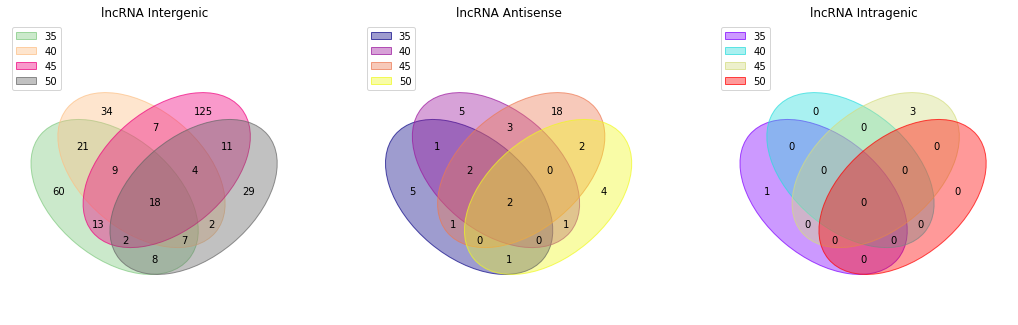

In [9]:
# Putative lncRNA adter Blastx, InterProScan and CPC2
intra_final = {'35':set(), '40':set(), '45':set(), '50':set()}
inter_final = {'35':set(), '40':set(), '45':set(), '50':set()}
anti_final = {'35':set(), '40':set(), '45':set(), '50':set()}

dic_inter = get_validated()['u']
dic_antis = get_validated()['x']
dic_intra = get_validated()['i']

for k,v in dic_inter.items():
    for key, value in v.items():
        if value is not None:
            inter_final[key].add(k[0])

for k,v in dic_antis.items():
    for key, value in v.items():
        if value is not None:
            anti_final[key].add(k[0])

for k,v in dic_intra.items():
    for key, value in v.items():
        if value is not None:
            intra_final[key].add(k[0])

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(18, 13))
venn(inter_final, fontsize=10, legend_loc="upper left", cmap='Accent', ax=ax[0]).set_title('lncRNA Intergenic')
venn(anti_final, fontsize=10, legend_loc="upper left", cmap='plasma', ax=ax[1]).set_title('lncRNA Antisense')
venn(intra_final, fontsize=10, legend_loc="upper left", cmap='rainbow', ax=ax[2]).set_title('lncRNA Intragenic')

Text(0.5, 1.0, 'mRNA - Probable')

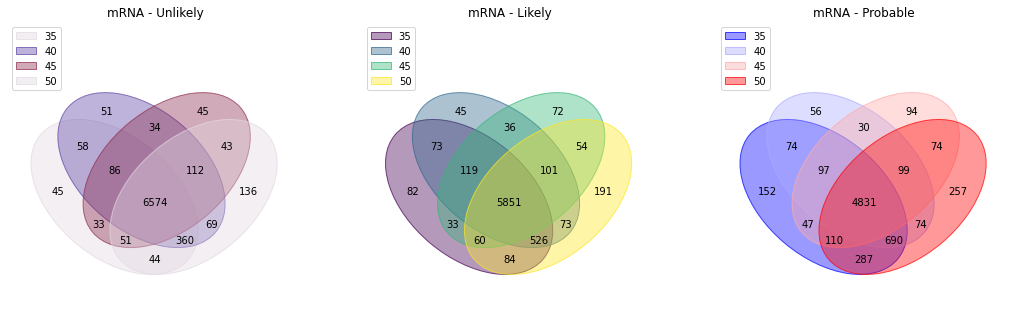

In [10]:
# Putative mRNA after Blastx, InterProScan and CPC2
pcg3 = {'35':set(), '40':set(), '45':set(), '50':set()}
pcg2 = {'35':set(), '40':set(), '45':set(), '50':set()}
pcg1 = {'35':set(), '40':set(), '45':set(), '50':set()}

group = {'35':[3,4,5],'40':[6,7,8], '45':[9,10,11], '50':[1,2,12]}
all_t1 = get_tracking(_group=group, _code=['='], _exp=1)
all_t2 = get_tracking(_group=group, _code=['='], _exp=2)
all_t3 = get_tracking(_group=group, _code=['='], _exp=3)

for k,v in all_t1.items():
    for key, value in v.items():
        if (value is not None):
            pcg1[key].add(k[0])

for k,v in all_t2.items():
    for key, value in v.items():
        if (value is not None):
            pcg2[key].add(k[0])

for k,v in all_t3.items():
    for key, value in v.items():
        if (value is not None):
            pcg3[key].add(k[0])

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(18, 13))
venn(pcg1, fontsize=10, legend_loc="upper left", cmap='twilight', ax=ax[0]).set_title('mRNA - Unlikely')
venn(pcg2, fontsize=10, legend_loc="upper left", cmap='viridis', ax=ax[1]).set_title('mRNA - Likely')
venn(pcg3, fontsize=10, legend_loc="upper left", cmap='bwr', ax=ax[2]).set_title('mRNA - Probable')

In [16]:
for k,v in pcg3.items():
    print(k, len(v))

35 6288
40 5951
45 5382
50 6422


In [83]:
# Exon, FPKM, FPKM STD, TPM, TPM STD, coverage, coverage STD, length, length STD
# create a dataframe with the following features: Index (locus), TPM, CG content, molecule (mRNA, lncRNA), length, experiment, type (pcg, intergenic, intragenic, antisense), exons isoform
# One dataframe per experiment comparison for DEG and lncRNA such as 35x40, 35x45 and 35x50

list35 = []
for k, v in all_transcripts.items():
    if k[0] in inter_final['35'] or k[0] in intra_final['35'] or k[0] in anti_final['35']:
        tmp = []
        for key, vals in v.items():
            if vals is not None:
                if key == '35':
                    tmp.extend([k[0], k[1], k[2], '35'])
                    tmp.extend(vals)
                    list35.append(tmp)

list40 = []
for k, v in all_transcripts.items():
    if k[0] in inter_final['40'] or k[0] in intra_final['40'] or k[0] in anti_final['40']:
        tmp = []
        for key, vals in v.items():
            if vals is not None:
                if key == '40':
                    tmp.extend([k[0], k[1], k[2], '40'])
                    tmp.extend(vals)
                    list40.append(tmp)

list45 = []
for k, v in all_transcripts.items():
    if k[0] in inter_final['45'] or k[0] in intra_final['45'] or k[0] in anti_final['45']:
        tmp = []
        for key, vals in v.items():
            if vals is not None:
                if key == '45':
                    tmp.extend([k[0], k[1], k[2], '45'])
                    tmp.extend(vals)
                    list45.append(tmp)

list50 = []
for k, v in all_transcripts.items():
    if k[0] in inter_final['50'] or k[0] in intra_final['50'] or k[0] in anti_final['50']:
        tmp = []
        for key, vals in v.items():
            if vals is not None:
                if key == '50':
                    tmp.extend([k[0], k[1], k[2], '50'])
                    tmp.extend(vals)
                    list50.append(tmp)

# Add mRNA into each list
for t,l in zip(['35','40','45','50'],[list35, list40, list45, list50]):
    for k, v in get_only_transcripts(all_transcripts, '=').items():
        tmp = []
        for key, vals in v.items():
                if vals is not None:
                    if key == t:
                        tmp.extend([k[0], k[1], k[2], t])
                        tmp.extend(vals)
                        l.append(tmp)


In [ ]:
df35 = pd.DataFrame(list35, columns=['TID','Locus','Molecule','Temperature','Exon','FKPM','FKPM-STD','TPM','TPM-STD','Coverage','Coverage-STD','Length','Length-STD'])
df40 = pd.DataFrame(list40, columns=['TID','Locus','Molecule','Temperature','Exon','FKPM','FKPM-STD','TPM','TPM-STD','Coverage','Coverage-STD','Length','Length-STD'])
df45 = pd.DataFrame(list45, columns=['TID','Locus','Molecule','Temperature','Exon','FKPM','FKPM-STD','TPM','TPM-STD','Coverage','Coverage-STD','Length','Length-STD'])
df50 = pd.DataFrame(list50, columns=['TID','Locus','Molecule','Temperature','Exon','FKPM','FKPM-STD','TPM','TPM-STD','Coverage','Coverage-STD','Length','Length-STD'])

In [85]:
# Calculate GC content for each transcript
from Bio.SeqUtils import GC

def get_CG(tid):
    return GC(seq_dic[tid].seq)

df35['CG'] = df35['TID'].apply(get_CG)
df40['CG'] = df40['TID'].apply(get_CG)
df45['CG'] = df45['TID'].apply(get_CG)
df50['CG'] = df50['TID'].apply(get_CG)

# Calculate Molecular weight content for each transcript
from Bio.SeqUtils import molecular_weight as MW

def get_MW(tid):
    return MW(seq_dic[tid].seq)

df35['MW'] = df35['TID'].apply(get_MW)
df40['MW'] = df40['TID'].apply(get_MW)
df45['MW'] = df45['TID'].apply(get_MW)
df50['MW'] = df50['TID'].apply(get_MW)

# Get strand
def get_strand(tid):
    return seq_dic[tid].description.split('|')[2][0]

df35['Strand'] = df35['TID'].apply(get_strand)
df40['Strand'] = df40['TID'].apply(get_strand)
df45['Strand'] = df45['TID'].apply(get_strand)
df50['Strand'] = df50['TID'].apply(get_strand)

# Get start
def get_start(tid):
    return seq_dic[tid].description.split('|')[1].split('-')[0]

df35['Start'] = df35['TID'].apply(get_start)
df40['Start'] = df40['TID'].apply(get_start)
df45['Start'] = df45['TID'].apply(get_start)
df50['Start'] = df50['TID'].apply(get_start)

# Get start
def get_end(tid):
    return seq_dic[tid].description.split('|')[1].split('-')[1]

df35['End'] = df35['TID'].apply(get_end)
df40['End'] = df40['TID'].apply(get_end)
df45['End'] = df45['TID'].apply(get_end)
df50['End'] = df50['TID'].apply(get_end)

# Figure out whether the locus belongs to a lncRNA or mRNA
def get_mol(molecule):
    if '=' in molecule:
        return 'mRNA'
    return 'lncRNA'

df35['Type'] = df35['Molecule'].apply(get_mol)
df40['Type'] = df40['Molecule'].apply(get_mol)
df45['Type'] = df45['Molecule'].apply(get_mol)
df50['Type'] = df50['Molecule'].apply(get_mol)


# Figure out whether the locus belongs to a lncRNA or mRNA
def get_transcript(molecule):
    if 'u' in molecule:
        return 'Intergenic'
    elif 'x' in molecule:
        return 'Antisense'
    elif 'i' in molecule:
        return 'Intragenic'
    else:
        return 'mRNA'

df35['Transcript'] = df35['Molecule'].apply(get_transcript)
df40['Transcript'] = df40['Molecule'].apply(get_transcript)
df45['Transcript'] = df45['Molecule'].apply(get_transcript)
df50['Transcript'] = df50['Molecule'].apply(get_transcript)

In [86]:
df_all = pd.concat([df35, df40, df45, df50], axis=0)
df_all

,TID,Locus,Molecule,Temperature,Exon,FKPM,FKPM-STD,TPM,TPM-STD,Coverage,Coverage-STD,Length,Length-STD,CG,MW,Strand,Start,End,Type,Transcript
0,TCONS_00000430,XLOC_000343,i,35,1,30.868756,6.691367,65.916686,15.524465,167.483327,30.583746,923.000000,157.267288,53.357532,340621.9082,+,2666950,2668051,lncRNA,Intragenic
1,TCONS_00000793,XLOC_000639,u,35,1,11.907857,3.909841,25.091648,7.178958,65.453276,23.911393,602.666667,121.145918,51.566952,216873.1272,+,4930444,4931145,lncRNA,Intergenic
2,TCONS_00000956,XLOC_000787,x,35,2,9.759382,11.292518,20.587930,23.799495,52.416943,59.530456,579.333333,299.687059,58.601554,278351.9554,+,6089422,6090388,lncRNA,Antisense
3,TCONS_00001273,XLOC_001054,u,35,2,10.488826,5.642147,22.052354,10.980949,58.063119,33.820292,1036.666667,593.540507,54.038350,531383.0106,+,8042104,8043886,lncRNA,Intergenic
4,TCONS_00001375,XLOC_001141,u,35,2,3.509667,1.112564,7.403827,2.028313,19.304920,6.944726,649.000000,81.461647,58.793970,307307.0730,+,8744147,8745212,lncRNA,Intergenic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,TCONS_00035288,XLOC_011667,=,50,1,66.974977,6.559042,139.598361,13.345522,381.150553,56.500695,1139.000000,0.000000,61.720808,351885.5225,-,4066111,4067249,mRNA,mRNA
6509,TCONS_00035289,XLOC_011668,=,50,4,120.247480,51.397927,252.128998,111.184100,679.388275,294.506306,1732.000000,0.000000,60.277136,533122.7813,-,4068709,4070762,mRNA,mRNA
6510,TCONS_00035290,XLOC_011669,=,50,3,1.888069,0.402279,3.925603,0.756212,10.794588,2.857020,1355.000000,0.000000,55.571956,419450.8222,-,4082012,4083493,mRNA,mRNA
6511,TCONS_00035291,XLOC_011670,=,50,2,1.051927,0.583379,2.177945,1.172311,6.093843,3.590561,1229.000000,0.000000,57.933279,378867.0524,-,4084130,4085432,mRNA,mRNA


In [87]:
pcg = df_all.groupby(['Locus','Transcript']).size()
data=pcg[pcg >= 1]
data_df = pd.DataFrame(data, columns=['Quantity']).reset_index()
data_df[data_df.Transcript == 'mRNA'].sort_values('Quantity')

,Locus,Transcript,Quantity
1812,XLOC_002503,mRNA,1
5320,XLOC_009256,mRNA,1
1612,XLOC_002236,mRNA,1
1616,XLOC_002241,mRNA,1
1619,XLOC_002246,mRNA,1
...,...,...,...
6511,XLOC_011461,mRNA,14
1162,XLOC_001605,mRNA,14
4963,XLOC_008735,mRNA,14
6268,XLOC_011109,mRNA,15


In [88]:
isoforms = []
tmp = get_validated()['=']
for k,v in tmp.items():
    isoforms.append([k[0], k[1], 'mRNA'])

tmp = get_validated()['u']
for k,v in tmp.items():
    isoforms.append([k[0], k[1], 'Intergenic'])

tmp = get_validated()['x']
for k,v in tmp.items():
    isoforms.append([k[0], k[1], 'Antisense'])

tmp = get_validated()['i']
for k,v in tmp.items():
    isoforms.append([k[0], k[1], 'Intragenic'])

df_iso = pd.DataFrame(isoforms, columns=['Transcript','Locus', 'Type'])
df_iso = df_iso.groupby(['Type','Locus']).size().reset_index()
df_iso.columns = ['Type', 'Locus', 'Quantity']
#df_iso[(df_iso.Quantity >= 1) & (df_iso.Type == 'mRNA')].sort_values('Quantity')
df_iso
#ax = sns.countplot(data=df_iso, x='Quantity', hue='Type', dodge=True)
#ax = sns.catplot(x="Type",y="Quantity", kind="bar", data=df_iso, height=5,aspect=1.5,errorbar=None, )
#ax.set(yscale="log")
#ax.set_ylabel('Transcripts (log)')
#ax.set_xlabel('Number of Isoforms')

,Type,Locus,Quantity
0,Antisense,XLOC_000787,1
1,Antisense,XLOC_001352,1
2,Antisense,XLOC_001481,1
3,Antisense,XLOC_001515,1
4,Antisense,XLOC_001548,1
...,...,...,...
6661,mRNA,XLOC_011667,1
6662,mRNA,XLOC_011668,1
6663,mRNA,XLOC_011669,1
6664,mRNA,XLOC_011670,1


Text(0.5, 0, 'Number of Isoforms')

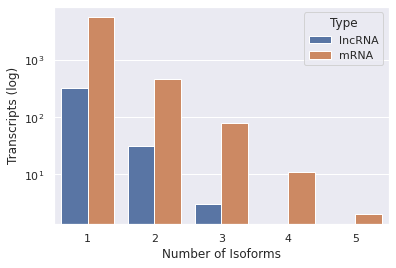

In [22]:
isoforms = []
tmp = get_validated()['=']
for k,v in tmp.items():
    isoforms.append([k[0], k[1], 'mRNA'])

tmp = get_validated()['u']
for k,v in tmp.items():
    isoforms.append([k[0], k[1], 'lncRNA'])

tmp = get_validated()['x']
for k,v in tmp.items():
    isoforms.append([k[0], k[1], 'lncRNA'])

tmp = get_validated()['i']
for k,v in tmp.items():
    isoforms.append([k[0], k[1], 'lncRNA'])

df_iso = pd.DataFrame(isoforms, columns=['Transcript','Locus', 'Type'])
df_iso = df_iso.groupby(['Type','Locus']).size().reset_index()
df_iso.columns = ['Type', 'Locus', 'Quantity']
#df_iso[(df_iso.Quantity >= 1) & (df_iso.Type == 'mRNA')].sort_values('Quantity')
df_iso
ax = sns.countplot(data=df_iso, x='Quantity', hue='Type', dodge=True)
#ax = sns.catplot(x="Type",y="Quantity", kind="bar", data=df_iso, height=5,aspect=1.5,errorbar=None, )
ax.set(yscale="log")
ax.set_ylabel('Transcripts (log)')
ax.set_xlabel('Number of Isoforms')

Text(0.5, 0, 'Number of exons')

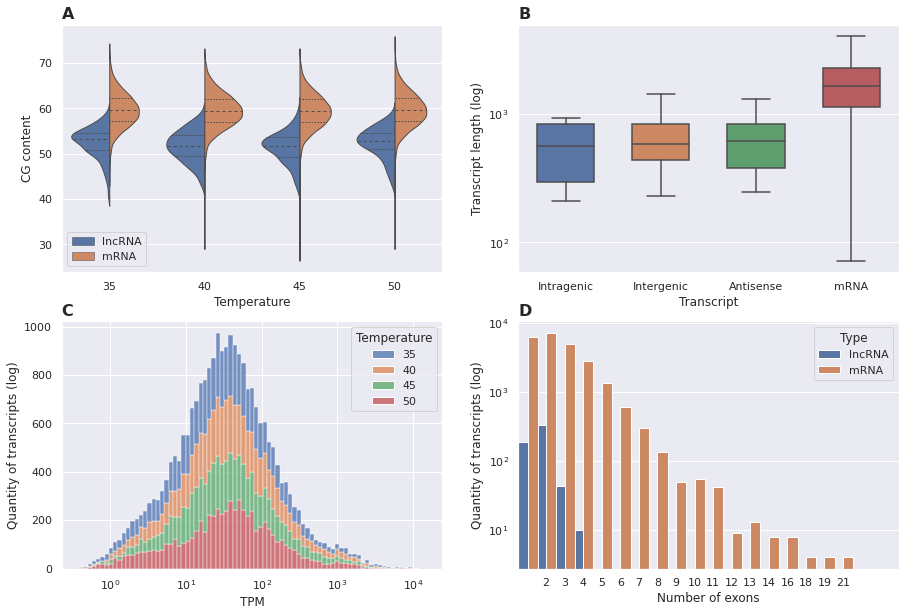

In [90]:
# CG-content over temperature
import seaborn as sns
sns.set_style("darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# AX 0
g1 = sns.violinplot(data=df_all, x="Temperature", y="CG", hue="Type",
               split=True, inner="quart", linewidth=1, ax=axs[0,0])
#g1.legend(loc='lower right', bbox_to_anchor=(1, 1))
g1.legend(loc='lower left')
#plt.title('Comparing CG-content between mRNAs and lncRNAs')
g1.set_title("A",loc='left', fontweight="bold", fontsize=16)
g1.set_ylabel('CG content')

# AX 1
# Plot the orbital period with horizontal boxes
g2 = sns.boxplot(y="Length", x="Transcript", data=df_all, width=.6, ax=axs[0,1], showfliers = False)
g2.set_ylabel('Transcript length (log)')
g2.set_yscale('log')
g2.set_title("B",loc='left', fontweight="bold", fontsize=16)

# AX 2
g3 = sns.histplot(data=df_all,
    x="TPM", hue="Temperature",
    multiple="stack",
    ax=axs[1,0], log_scale=True)
#g3.set_xscale('log')
g3.set_title("C",loc='left', fontweight="bold", fontsize=16)
g3.set_ylabel('Quantity of transcripts (log)')


# AX 4
g4 = sns.countplot(data=df_all, x='Exon', hue='Type', width=1.1, ax=axs[1,1])
g4.set_xticks(range(1,21))
g4.set_yscale('log', base=10)
g4.set_title("D",loc='left', fontweight="bold", fontsize=16)
g4.set_ylabel('Quantity of transcripts (log)')
g4.set_xlabel('Number of exons')

In [91]:
# Find unique lncRNA which was only expressed in one experiment
# only 35
#intra_final['35'].difference(intra_final['40'],intra_final['45'],intra_final['50'])
lnc_uniq_35 = inter_final['35'].difference(inter_final['40'],inter_final['45'],inter_final['50'])
lnc_uniq_40 = inter_final['40'].difference(inter_final['35'],inter_final['45'],inter_final['50'])
lnc_uniq_45 = inter_final['45'].difference(inter_final['40'],inter_final['35'],inter_final['50'])
lnc_uniq_50 = inter_final['50'].difference(inter_final['40'],inter_final['45'],inter_final['35'])

lnc_uniq_35_seqs, lnc_uniq_50_seqs, lnc_uniq_40_seqs, lnc_uniq_45_seqs = [],[],[],[]
# save them into a file
for seq in lnc_uniq_35:
    lnc_uniq_35_seqs.append(seq_dic[seq])

for seq in lnc_uniq_40:
    lnc_uniq_40_seqs.append(seq_dic[seq])

for seq in lnc_uniq_45:
    lnc_uniq_45_seqs.append(seq_dic[seq])

for seq in lnc_uniq_50:
    lnc_uniq_50_seqs.append(seq_dic[seq])

write = True

# Write the sequences into files
if write:
    with open(OUTDIR + '/lncrna/lncrna_unique_35.fasta', "w") as output:
        SeqIO.write(lnc_uniq_35_seqs, output, "fasta")
    with open(OUTDIR + '/lncrna/lncrna_unique_40.fasta', "w") as output:
        SeqIO.write(lnc_uniq_40_seqs, output, "fasta")
    with open(OUTDIR + '/lncrna/lncrna_unique_45.fasta', "w") as output:
        SeqIO.write(lnc_uniq_45_seqs, output, "fasta")
    with open(OUTDIR + '/lncrna/lncrna_unique_50.fasta', "w") as output:
        SeqIO.write(lnc_uniq_50_seqs, output, "fasta")

In [ ]:
from Bio.SeqUtils import GC123
lnc_gc123_35,lnc_gc123_40,lnc_gc123_45,lnc_gc123_50 = [],[],[],[]
for org, lst in zip([lnc_gc123_35,lnc_gc123_40,lnc_gc123_45,lnc_gc123_50], [lnc_uniq_35_seqs, lnc_uniq_50_seqs, lnc_uniq_40_seqs, lnc_uniq_45_seqs]):
    for each in lst:
        org.append(GC123(each)[1:])

mrna_gc123 = []
for k, _ in get_only_transcripts(all_transcripts, '=').items():
    mrna_gc123.append(GC123(seq_dic[k[0]].seq)[1:])        

df_cg123_35 = pd.DataFrame(lnc_gc123_35, columns=['GC1', 'GC2', 'GC3'])
df_cg123_40 = pd.DataFrame(lnc_gc123_40, columns=['GC1', 'GC2', 'GC3'])
df_cg123_45 = pd.DataFrame(lnc_gc123_45, columns=['GC1', 'GC2', 'GC3'])
df_cg123_50 = pd.DataFrame(lnc_gc123_50, columns=['GC1', 'GC2', 'GC3'])
df_cg123_m = pd.DataFrame(mrna_gc123, columns=['GC1', 'GC2', 'GC3'])

df_cg123 = pd.concat([df_cg123_35,df_cg123_40,df_cg123_45,df_cg123_50])
df_cg123

In [93]:
# Show length and TPM
lst_all = []
for each in [inter_final, intra_final, anti_final]:
    for k, v in each.items():
        lst_all.extend(v)

# return only the keys in the lst_all
filtered_dic = {key: value for key, value in all_transcripts.items() if key[0] in lst_all}
# Exon, FPKM, FPKM STD, TPM, TPM STD, coverage, coverage STD, length, length STD

len_all, len_all_std = [],[]
for k,v in filtered_dic.items():
    for key, val in v.items():
        if val is not None:
            len_all.append(val[7])
            len_all_std.append(val[8])

df_len = pd.DataFrame({'Length':len_all, 'Length STD':len_all_std})            

In [ ]:
# Print GC3 for lncRNA (which doesnt make sense) and mRNA
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
g1 = sns.boxplot(df_cg123[['GC1', 'GC2', 'GC3']], palette='hot' , ax=axs[0])
axs[0].set(ylim=(20, 100))
axs[0].set_title('lncRNA')
g2 = sns.boxplot(df_cg123_m[['GC1', 'GC2', 'GC3']], ax=axs[1])
axs[1].set(ylim=(20, 100))
axs[1].set_title('mRNA')

In [ ]:
# Printing lncRNA chromosome positions - file to be used in R
all_lnc = []
dic_log2fc = dict()

chrs = {'NC_016472.1':'chr1','NC_016473.1':'chr2','NC_016474.1':'chr3','NC_016475.1':'chr4','NC_016476.1':'chr5','NC_016477.1':'chr6','NC_016478.1':'chr7' }

for each in [intra_final, inter_final, anti_final]:
    for _, v in each.items():
        all_lnc.extend(list(v))

# Remove duplicate values
all_lnc = set(all_lnc)
valid = get_validated_symbols_temp()['50']

# Find locus and log2fc
with open(OUTDIR + '/DESeq/result_35_50_my_output_val.csv') as out:
    for line in out:
        if 'log2FoldChange' not in line:
            locus, _, log2fc, _, _, _, _ = line.strip().split(',')
            locus = locus.replace('"','')
            dic_log2fc[locus] = log2fc

print_all = []
with open(OUTDIR + '/chromo/all_locus') as out:
    for line in out:
        chr, start, end, _, transcript = line.strip().split()
        transcript = transcript.replace('"','')
        if transcript in all_lnc:
            locus = get_locus(transcript)
            if locus in dic_log2fc.keys() and locus in valid:
                print(locus, chrs[chr], start, end, dic_log2fc[locus], sep='\t')

In [ ]:
# Processing CPC2 output
with open(OUTDIR + '/cpc2/cpc_results') as out:
    coding, noncoding = [], []
    for line in out:
        if '#ID' not in line:
            transfrag, _, _, _, _, _, code = line.strip().split()
            if 'reverse' in transfrag:
                  transfrag = transfrag.split('(')[0]
            
            if code == 'coding':
                coding.append(transfrag)
            else:
                noncoding.append(transfrag)


for x in set([x for x in coding if x not in noncoding]):
    print(x)

In [ ]:
# Processing CPC2 output - CODING ONLY
with open(OUTDIR + '/CPC2/cpc_results') as out:
    coding, noncoding = [], []
    for line in out:
        if '#ID' not in line:
            transfrag, _, _, _, _, _, code = line.strip().split()
            if 'reverse' in transfrag:
                  transfrag = transfrag.split('(')[0]
            
            if code == 'coding':
                coding.append(transfrag)
            else:
                noncoding.append(transfrag)

# Output only the coding
for x in set([x for x in coding if x not in noncoding]):
    print(x)

LncRNAs 55
mRNAs 445


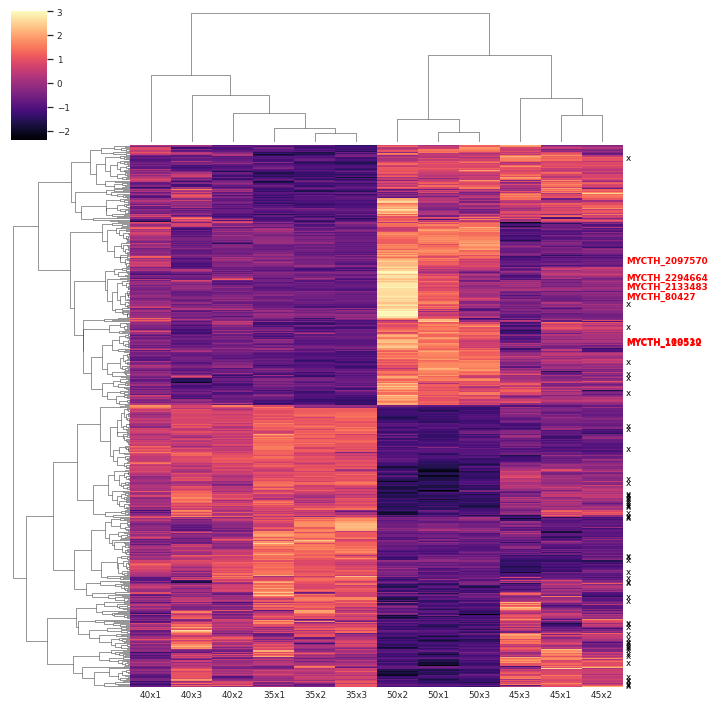

In [11]:
# Finding the 500 top genes from DESeq2 results
deseq_df = pd.read_csv(OUTDIR + '/DESeq/overall_result_my_output_val.csv', index_col=0)
deseq_df['ABS'] = deseq_df['log2FoldChange'].apply(np.abs)

top_genes = deseq_df[deseq_df.padj < 0.05].sort_values('ABS', ascending=False)[0:500].index.to_list()

# How many lncRNA are possible transcripts?
xloc = [x for x in top_genes if 'XLOC' in x]
pcg = [x for x in top_genes if 'MYC' in x]

print('LncRNAs', len(xloc))
print('mRNAs', len(pcg))

hcluster = pd.read_csv(OUTDIR + '/DESeq/dataHeatmap_my_afterz_score_val.csv', index_col=0)

cmap = sns.color_palette("magma", as_cmap=True)
sns.set(font_scale=.8)
g = sns.clustermap(hcluster.loc[top_genes], metric="correlation", method="complete", cmap=cmap, yticklabels=True)

# Show only HSP
#visible_labels = [label if label.get_text() in HSP_SYM+CP450_SYM or 'XLOC' in label.get_text() else '' for label in g.ax_heatmap.axes.get_yticklabels()]
visible_labels = []
for label in g.ax_heatmap.axes.get_yticklabels():
    if 'XLOC' in label.get_text():
        label.set_text('x')
        # CP450_SYM HSP_SYM
    elif label.get_text() in HSP_SYM:
        label.set_text(label.get_text())
    elif 'MYC' in label.get_text():
        label.set_text('')
    visible_labels.append(label)

g.ax_heatmap.axes.set_yticklabels(visible_labels)
for tick_label in g.ax_heatmap.axes.get_yticklabels():
    tick_text = tick_label.get_text()
    if tick_text.upper() in HSP_SYM:
        tick_label.set_color('red')
        tick_label.set_fontweight(weight='bold')
    elif tick_text.upper() in CP450_SYM:
        tick_label.set_color('green')
        tick_label.set_fontweight(weight='bold')
    elif 'XLOC' in tick_text.upper():
        tick_label.set_color('blue')
        tick_label.set_fontweight(weight='bold')
    else:
        tick_label.set_color('black')

g.ax_heatmap.axes.tick_params(axis='both', which='both', length=0)  

In [99]:
def get_symbol(symbol):
    if '|' in symbol:
        return symbol.split('-')[1]
    return symbol

dfs = []

for each in ('/DESeq/result_35_40_my_output_val.csv', '/DESeq/result_35_45_my_output_val.csv','/DESeq/result_35_50_my_output_val.csv'):
    deseq = pd.read_csv(OUTDIR + each)
    deseq['ABS'] = deseq['log2FoldChange'].apply(np.abs)
    #deseq = deseq[deseq['ABS'] > 1.5]
    deseq.rename(columns={'Unnamed: 0':'Symbol'}, inplace=True)
    deseq['Symbol'] = deseq['Symbol'].apply(get_symbol)

    dfs.append(deseq)
dfs[0]['Exp'] = '35x40'
dfs[0] = dfs[0][dfs[0]['Symbol'].isin(get_validated_symbols_temp()['40'])]
dfs[1]['Exp'] = '35x45'
dfs[1] = dfs[1][dfs[1]['Symbol'].isin(get_validated_symbols_temp()['45'])]
dfs[2]['Exp'] = '35x50'
dfs[2] = dfs[2][dfs[2]['Symbol'].isin(get_validated_symbols_temp()['50'])]

In [ ]:
# the DFs should be filtered for lncrnas that are specific for each experiment and validated to. For instance, experiment 35x40 has 95 PCG and 8 lncrna.
# The DESeq2 also must have the same transcripts once one transcripts from experiment 35x40 is not validated for the experiment 35x45.

In [100]:
values = []
for df in dfs:
    pcg_up = df.loc[(df['Symbol'].str.contains('MYCTH')) & (df['log2FoldChange'] > 0)]
    pcg_dw = df.loc[(df['Symbol'].str.contains('MYCTH')) & (df['log2FoldChange'] < 0)]
    lnc_up = df.loc[(df['Symbol'].str.contains('XLOC')) & (df['log2FoldChange'] > 0)]
    lnc_dw = df.loc[(df['Symbol'].str.contains('XLOC')) & (df['log2FoldChange'] < 0)]

    values.append([df['Exp'].unique()[0], len(pcg_up), len(pcg_dw)*-1, len(lnc_up), len(lnc_dw)*-1])

dfx = pd.DataFrame(values, columns=['Experiment','PCG UP', 'PCG DW', 'LNC UP', 'LNC DW']).set_index('Experiment')
dfx

,PCG UP,PCG DW,LNC UP,LNC DW
Experiment,,,,
35x40,45,-27,3,-1
35x45,402,-384,51,-5
35x50,487,-353,9,-10


Text(0.5, 0, 'Experiments')

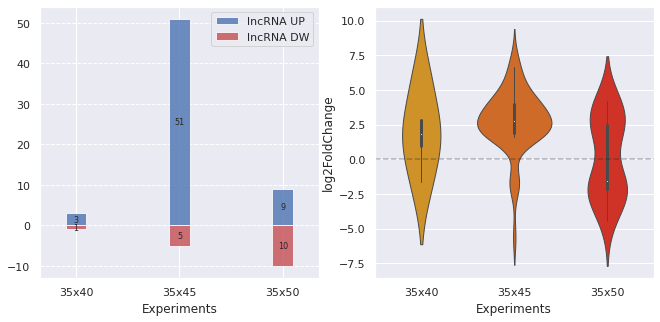

In [101]:
values = []
for df in dfs:
    lnc_up = df.loc[(df['Symbol'].str.contains('XLOC')) & (df['log2FoldChange'] > 0)]
    lnc_dw = df.loc[(df['Symbol'].str.contains('XLOC')) & (df['log2FoldChange'] < 0)]

    values.append([df['Exp'].unique()[0], len(lnc_up), len(lnc_dw)*-1])


fig, ax = plt.subplots(1, 2, figsize=(11, 5))
dfx = pd.DataFrame(values, columns=['Experiment','lncRNA UP', 'lncRNA DW']).set_index('Experiment')
dfx.plot(kind='bar', stacked=True, alpha=0.8, width=0.2, ax=ax[0], color=['b','r'])
#ax.axhline(0, color='k', linestyle='--', alpha=0.3)
#ax.set_xticks(, minor=True )
ax[0].grid('on', which='minor', axis='y',linestyle='--' )
ax[0].grid('off', which='major', axis='y' , linestyle='--')
#ax[0].legend(loc='upper right', bbox_to_anchor=(1.3,1))
ax[0].set_xlabel('Experiments')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0)

for c in ax[0].containers:
    labels = [f'{(np.abs(v.get_height())):.0f}' for v in c]
    ax[0].bar_label(c, labels=labels, label_type='center', padding=0, fontsize=8)

df1 = dfs[0][['Symbol','log2FoldChange','Exp']]
df2 = dfs[1][['Symbol','log2FoldChange','Exp']]
df3 = dfs[2][['Symbol','log2FoldChange','Exp']]
features = pd.concat([df1, df2, df3], axis=0)

sns.violinplot(data=features[features['Symbol'].str.contains('XLOC')], x="Exp", y='log2FoldChange', split=True, linewidth=1, horizontal=True, palette=['#eb990c','#eb650c','#eb1b0c'], ax=ax[1])
ax[1].axhline(0, color='k', linestyle='--', alpha=0.3)
ax[1].set_xlabel('Experiments')

In [11]:
# Processing WGCNA output - v1
all_genes_lnc_mrna = []

with open(OUTDIR + '/wgcna/gene_modules_val.txt') as out:
    for line in out:
        line = line.strip()
        gene, color = line.split('\t')
        if 'gene_id' not in gene:
            if 'XLOC' in gene:
                all_genes_lnc_mrna.append([color, 'lncRNA'])
            if 'MYC' in gene:
                all_genes_lnc_mrna.append([color, 'PCG'])

In [12]:
# Processing WGCNA output - v1
all_genes_hsp_cp450 = []

with open(OUTDIR + '/wgcna/gene_modules_val.txt') as out:
    for line in out:
        line = line.strip()
        gene, color = line.split('\t')
        if 'gene_id' not in gene:
            if gene in HSP_SYM:
                all_genes_hsp_cp450.append([color, 'HSP'])
            if gene in CP450_SYM:
                all_genes_hsp_cp450.append([color, 'CP450'])

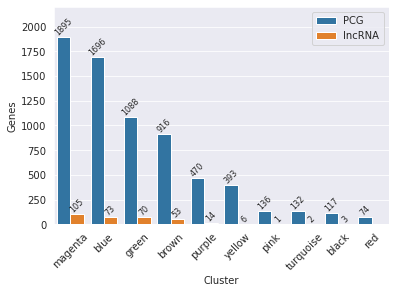

In [13]:
sns.set_style("darkgrid")
df_lnc_mrna = pd.DataFrame(all_genes_lnc_mrna, columns=['Color','Type'])
df_lnc_mrna = df_lnc_mrna.groupby(['Color', 'Type']).size().reset_index(name='Total')

ax = sns.barplot(data=df_lnc_mrna.sort_values('Total', ascending=False),x='Color', y='Total', hue='Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylim(0,2200)
ax.legend(loc='upper right')
ax.set_xlabel('Cluster')
ax.set_ylabel('Genes')

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()):.0f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge', size=8, rotation=45)

Text(0, 0.5, 'lncRNA')

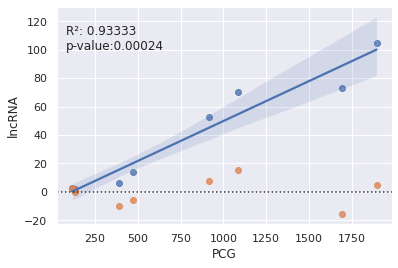

In [105]:
sns.set_style('darkgrid')
# create a DataFrame with protein coding genes and lncRNA

#ax = sns.barplot(data=df[(df['Type'] == 'HSP') | (df['Type'] == 'CP450')].sort_values('Total'),x='Color', y='Total', hue='Type', palette='Set1', order=order)

#fig, ax = plt.subplots(1,2, figsize=(12, 5))
df11 = df_lnc_mrna[(df_lnc_mrna['Type'] == 'PCG') & (df_lnc_mrna['Color'] != 'red') ]['Total']
df21 = df_lnc_mrna[df_lnc_mrna['Type'] == 'lncRNA']['Total']
s_coef, sp_value = scipy.stats.spearmanr(df11, df21)
ax = sns.regplot(x=df11, y=df21)
sns.residplot(x=df11, y=df21)
ax.text(80, 100, 'R²: ' + str(round(s_coef,5)) + '\n' + 'p-value:' + str(round(sp_value,5)))
ax.set_xlabel('PCG')
ax.set_ylabel('lncRNA')

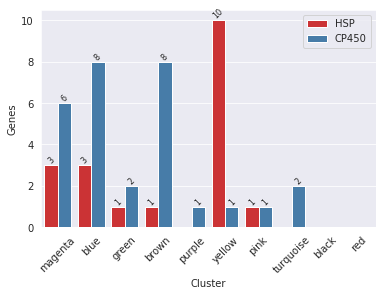

In [19]:
sns.set_style("darkgrid")
df_hsp_cp450 = pd.DataFrame(all_genes_hsp_cp450, columns=['Color','Type'])
df_hsp_cp450 = df_hsp_cp450.groupby(['Color', 'Type']).size().reset_index(name='Total')

# remove blank colors

order = ['magenta', 'blue', 'green', 'brown', 'purple', 'yellow', 'pink', 'turquoise', 'black', 'red']
ax = sns.barplot(data=df_hsp_cp450.sort_values('Total', ascending=False),x='Color', y='Total', hue='Type', palette='Set1', order=order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.legend(loc='upper right')
ax.set_xlabel('Cluster')
ax.set_ylabel('Genes')

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()):.0f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge', size=8, rotation=45)

0.2635231383473649 0.6683968370871737


Text(0.5, 0, 'HSP')

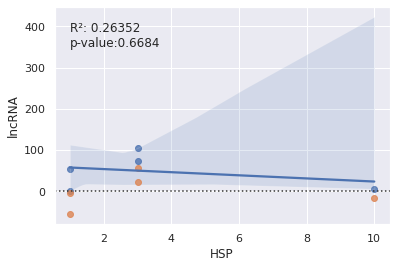

In [108]:
# HSP
sns.set_style('darkgrid')
# create a DataFrame with protein coding genes and lncRNA

#ax = sns.barplot(data=df[(df['Type'] == 'HSP') | (df['Type'] == 'CP450')].sort_values('Total'),x='Color', y='Total', hue='Type', palette='Set1', order=order)

cols = ['magenta','blue','brown','yellow','pink']
#fig, ax = plt.subplots(1,2, figsize=(12, 5))
df12 = df_hsp_cp450[df_hsp_cp450['Color'].isin(cols)].where(df_hsp_cp450['Type'] == 'HSP').dropna()['Total']
df22 = df_lnc_mrna[df_lnc_mrna['Color'].isin(cols)].where(df_lnc_mrna['Type'] == 'lncRNA').dropna()['Total']
s_coef, sp_value = scipy.stats.spearmanr(df12, df22)
print(s_coef, sp_value)
ax = sns.regplot(x=df12, y=df22)
sns.residplot(x=df12, y=df22)
ax.text(1, 350, 'R²: ' + str(round(s_coef,5)) + '\n' + 'p-value:' + str(round(sp_value,5)))
ax.set_ylabel('lncRNA')
ax.set_xlabel('HSP')



0.6918326955503612 0.05729645766572114


Text(0.5, 0, 'CP450')

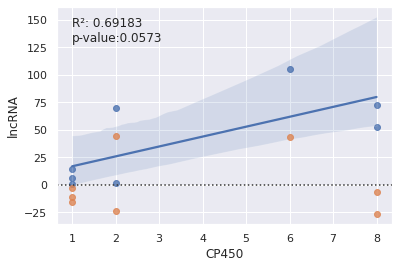

In [110]:
# HSP
sns.set_style('darkgrid')
# create a DataFrame with protein coding genes and lncRNA

#ax = sns.barplot(data=df[(df['Type'] == 'HSP') | (df['Type'] == 'CP450')].sort_values('Total'),x='Color', y='Total', hue='Type', palette='Set1', order=order)

cols = ['magenta','blue','brown','yellow','pink','turquoise','green','purple']

#fig, ax = plt.subplots(1,2, figsize=(12, 5))
df13 = df_hsp_cp450[df_hsp_cp450['Color'].isin(cols)].where(df_hsp_cp450['Type'] == 'CP450').dropna()['Total']
df23 = df_lnc_mrna[df_lnc_mrna['Color'].isin(cols)].where(df_lnc_mrna['Type'] == 'lncRNA').dropna()['Total']
s_coef, sp_value = scipy.stats.spearmanr(df13, df23)
print(s_coef, sp_value)
ax = sns.regplot(x=df13, y=df23)
sns.residplot(x=df13, y=df23)
ax.text(1, 130, 'R²: ' + str(round(s_coef,5)) + '\n' + 'p-value:' + str(round(sp_value,5)))
ax.set_ylabel('lncRNA')
ax.set_xlabel('CP450')
